In [2]:
import numpy as np
import math as ma
import matplotlib.pyplot as plt
import astropy.units as u
import pickle, json, warnings, astropy, os
from matplotlib.colors import LogNorm
from astropy.io.votable import parse
try: 
    import mosaic_tools as mt
    PT = mt.PlottingTools()
except ImportError: print 'mosaic_tools.py not found.'
%matplotlib inline

# Plotting Tools

### These functions allow one to input data and keyword argument dictionary to "quickly" plot either a line, scatter or histogram matplotlib plot

In [32]:
def linePlot(xdat,ydat,ax0=None,labels=('x','y'),xlog=False,ylog=False,**kw):
    """
    Input:
    ------
    xdat: numpy.array, x-axis data
    ydat: numpy.array, y-axis data
    ax0: None-type or axis object (plt.figure().add_subplot(111)). If None,
         an axis object is created.
    labels: 2x1 string-tuple, x and y-axis labels
    xlog, ylog: boolean, plot in log space.
    kw: dict, key-word dictionary of matplotlib plot inputs.
    
    Return:
    -------
    ax: axis plot object.
    """
    
    if ax0 is None:
        fig = plt.figure(figsize=(8,8))
        ax = fig.add_subplot(111)
    else: ax = ax0
    try:
        PT.plot_setup(ax,ylog=ylog,xlog=xlog)
    except: print 'mosaic_tools not installed.'

    ax.plot(xdat,ydat,**kw)
    ax.set_xlabel(r'%s'%labels[0],fontsize=20)
    ax.set_ylabel(r'%s'%labels[1],fontsize=20)
    
    return ax

def scatterPlot(xdat,ydat,ax0=None,labels=('x','y'),xlog=False,ylog=False,**kw):
    """
    Input:
    ------
    xdat: numpy.array, x-axis data
    ydat: numpy.array, y-axis data
    ax0: None-type or axis object (plt.figure().add_subplot(111)). If None,
         an axis object is created.
    labels: 2x1 string-tuple, x and y-axis labels
    xlog, ylog: boolean, plot in log space.
    kw: dict, key-word dictionary of matplotlib plot inputs.
    
    Return:
    -------
    ax: axis plot object.
    """
    
    if ax0 is None:
        fig = plt.figure(figsize=(8,8))
        ax = fig.add_subplot(111)
    else: ax = ax0
    
    try:
        PT.plot_setup(ax,ylog=ylog,xlog=xlog)
    except: print 'mosaic_tools not installed.'

    ax.plot(xdat,ydat,linestyle='None',**kw)
    ax.set_xlabel(r'%s'%labels[0],fontsize=20)
    ax.set_ylabel(r'%s'%labels[1],fontsize=20)

    return ax

def histPlot(xdat,bins=15,ax0=None,labels=('x','y'),xlog=False,ylog=False,**kw):
    """
    Input:
    ------
    xdat: numpy.array, x-axis data
    bins: int or numpy.array, bins.
    ax0: None-type or axis object (plt.figure().add_subplot(111)). If None,
         an axis object is created.
    labels: 2x1 string-tuple, x and y-axis labels
    xlog, ylog: boolean, plot in log space.
    kw: dict, key-word dictionary of matplotlib plot inputs.
    
    Return:
    -------
    ax: axis plot object.
    """
    
    if ax0 is None:
        fig = plt.figure(figsize=(8,8))
        ax = fig.add_subplot(111)
    else: ax = ax0

    try:
        PT.plot_setup(ax,ylog=ylog,xlog=xlog)
    except: print 'mosaic_tools not installed.'
    
    ax.hist(xdat,bins,**kw)
    ax.set_xlabel(r'%s'%labels[0],fontsize=20)
    ax.set_ylabel(r'%s'%labels[1],fontsize=20)    
    
    return ax

## E.g.

kw = {'markersize':10,'color':'magenta','marker':'D','alpha':.4}<br>
sp = scatterPlot(Mp/Mj,Rp/Rj,labels=('x','y'),xlog=True,**kw)<br>
sp.saveplot('filename.jpg') --> sp is now an plot-axis object.<br><br>

kw = {'markersize':10,'color':'red','marker':'o','linewidth':2,'ls':'--','alpha':.4}<br>
lp = linePlot(Mp/Mj,Rp/Rj,labels=('hi','no'),**kw)<br><br>

kw = {'markersize':10,'color':'red','linewidth':2,'ls':'--','alpha':.4}<br>
lp2 = linePlot(Mp/Mj,Rp/Rj,labels=('hi','no'),**kw)<br><br>

kw = {'histtype':'step','normed':True}<br>
bins = np.linspace(np.array(Mp/Mj).min(),np.array(Mp/Mj).max(),20)<br>
hp = histPlot(Mp/Mj,bins=bins,labels=('mass','count'),**kw)<br>


## Load Completeness and Simulation Results
### Results are loaded from a pickle file created in "EXOSIMS_end2end.pynb"

In [10]:
baseFolder = '/Users/rpatel/Dropbox/Research/WFIRST/EXOSIMSTesting/'
resultFolder = os.path.join(baseFolder,'SimResults')
scriptFolder = os.path.join(baseFolder,'scripts')
compFolder = os.path.join(baseFolder,'Completeness')
# ===============  LOAD JSON SCRIPT FILE =================

# jfile = 'template_WFIRST_KeplerLike.json'
# jfile = 'template_WFIRST_EarthTwinHabZone.json'
# jfile = 'template_WFIRST_KnownRV.json'
# jfile = 'template_rpateltest_KnownRV.json'
jfile = 'template_rpateltest_KnownRV_2years.json'
scriptfile = os.path.join(scriptFolder,jfile)
script = open(scriptfile).read()
specs_from_file = json.loads(script)

# ===============  LOAD COMPLETENESS FILE ===============

# cfile = 'EarthTwinHabZone2.comp'
# cfile = 'KeplerLike1.comp'
cfile = 'KnownRVPlanets_2yrs_5E+07stars_rpateltest.comp'
fle = os.path.join(compFolder,cfile)
dataCOMP = pickle.load(open(fle,'rb'))

# ===============  LOAD SIMULATION RESULTS ===============

#simresults = 'simresults_2yrs_5E+07stars_rpateltest_KnownRV.pickle'
#simresults = 'simresults_0.20yrs_rpateltest_KnownRV.pickle'
simresults = 'simresults_2.00yrs_rpateltest_KnownRV_2year.pickle'
basesim =  simresults.strip('simresults_').strip('.pickle')

simfile = os.path.join(resultFolder,simresults)
simr = pickle.load(open(simfile,'rb'))

print 'Upper level keys: \n\t', simr.keys()

Upper level keys: 
	['star_prop', 'DRM', 'empplanet_prop', 'synplanet_prop', 'AllSpecs']


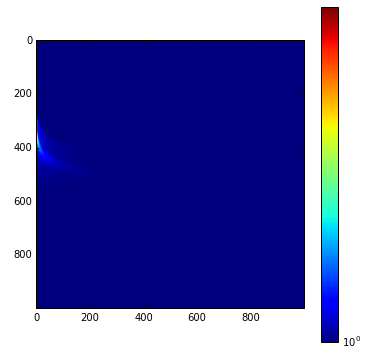

In [11]:
plt.figure(figsize=(6,6))
plt.imshow(dataCOMP + 1,norm=LogNorm())
plt.colorbar()
#plt.clim(1.7,2)

## Stellar Data

In [12]:
sp = simr['star_prop']
print 'Star property keys: \n\t', sp.keys()

Star property keys: 
	['Bmag', 'dist', 'BV', 'Binary_Cut', 'Spec', 'rv', 'Vmag', 'Imag', 'Kmag', 'Lum', 'pmdec', 'MsEst', 'Name', 'nStars', 'Jmag', 'Hmag', 'parx', 'MsTrue', 'Umag', 'comp0', 'MV', 'coords', 'pmra']


## Simulated Planet Data

In [13]:
pd_s = simr['synplanet_prop']
if pd_s is not None:
    print 'Simulated Planet property keys: \n\t', pd_s.keys()
else: print 'No simulated planets from this simulation'

No simulated planets from this simulation


## Empirical Planet Data

In [14]:
pd_e = simr['empplanet_prop']
if pd_e is not None:
    print 'Empirical Planet property keys: \n\t', pd_e.keys()
else: print 'No empirical planets from this simulation'

Empirical Planet property keys: 
	['Rp', 'I', 'fEZ', 'v', 'sInds', 'O', 'p', 'r', 'Mp', 'w', 'nplans', 'e', 'plan2star', 'sma']


# DRM and Specs of simulation

## All DRM keys and description

<b><font color='blue'>fill_keys</font></b><br>
<b><font color='red'>not_sure</font></b><br>
<b><font color='green'>dontdoanything</font></b><br>
<b><font color='magenta'>expand_keys</font></b><br>

<b><font color='blue'>star_ind (integer)</font></b><br>
    Index of the observed target star<br>

<b><font color='blue'>arrival_time (float)</font></b> <br>
    Elapsed time since mission start when observation begins in units of day<br>

<b><font color='magenta'>plan_inds (integer list)</b> <br>
    Indices of planets orbiting the observed target star<br>
    
<b><font color='blue'>det_time (float)</b> <br>
    Integration time for detection in units of day<br>
    
<b><font color='magenta'>det_status (integer list)</b> <br>
    List of detection status for each planet orbiting the observed targetstar, where 1 is detection, 0 missed detection, -1 below IWA, and -2 beyond OWA<br>
    
<b><font color='magenta'>det_SNR (float list)</b> <br>
    List of detection SNR values, only for observable planets<br>
    
<b><font color='magenta'>det_fEZ (float list)</b> <br>
    List of exo-zodi surface brightnesses at detection in units of 1=arcsec2 for each planet orbiting the observed target star<br>
    
<b><font color='magenta'>det_dMag (float list)</b> <br>
    List of delta magnitudes at detection for each planet orbiting the observed target star<br>
    
<b><font color='magenta'>det_WA (float list)</b> <br>
    List of working angles at detection in units of mas for each planet orbiting the observed target star<br>
    
<b><font color='green'>char_mode (dict)</b><br>
    Observing mode selected for characterization. Default is first spectro/IFS mod<br>
    
<b><font color='blue'>char_time (float)</b><br>
    Integration time for characterization in units of day<br>
    
<b><font color='magenta'>char_status (integer list)</b><br>
    List of characterization status for each planet orbiting the observed target star, where 1 is full spectrum, -1 partial spectrum, and 0 not characterized<br>
    
<b><font color='magenta'>char_SNR (float list)</b><br>
    List of characterization SNR values only for observable planets<br>
    
<b><font color='magenta'>char_fEZ (float list)</b><br>
    List of exo-zodi surface brightnesses at characterization in units of 1=arcsec2 for each planet orbiting the observed target star<br>

<b><font color='magenta'>char_dMag (float list)</b><br>
    List of delta magnitudes at characterization for each planet orbiting the observed target star<br>
    
<b><font color='magenta'>char_WA (float list)</b><br>
    List of working angles at characterization in units of mas for each planet orbiting the observed target star<br>

<b><font color='red'>FA_status (integer)</b><br>
    (if false alarm) Characterization status for a false alarm signal, where 1 is full spectrum, -1 partial spectrum, and 0 not characterized<br>
    
<b><font color='red'>FA_SNR (float)</b><br>
    (if false alarm) Characterization SNR value for a false alarm signal<br>
    
<b><font color='red'>FA_fEZ (float)</b><br>
    (if false alarm) Exo-zodi surface brightness for a false alarm signal in units of 1=arcsec2<br>
    
<b><font color='red'>FA_dMag (float)</b><br>
    (if false alarm) Delta magnitude for a false alarm signal<br>

<b><font color='red'>FA_WA (float)</b><br>
    (if false alarm) Working angle for a false alarm signal in units of mas<br>
    
<b><font color='green'>slew_time (float)</b><br>
    (if  occulter) Slew time to next target in units of day<br>

<b><font color='green'>slew_angle (float)</b><br>
    (if occulter) Slew angle to next target in units of deg<br>
    
<b><font color='green'>slew_dV (float)</b><br>
    (if occulter) Slew DV in units of m=s<br>

<b><font color='green'>slew_mass_used (float)</b><br>
    (if occulter) Slew fuel mass used in units of kg<br>
    
<b><font color='red'>det_dV (float)</b><br>
    (if occulter)  Detection station-keeping DV in units of m=s<br>
    
<b><font color='red'>det_mass_used (float)</b><br>
    (if occulter) Detection station-keeping fuel mass used in units of kg<br>
    
<b><font color='red'>det_dF_lateral (float)</b><br>
    (if occulter) Detection station-keeping lateral disturbance force on occulter in units of N<br>

<b><font color='red'>det_dF_axial (float)</b><br>
    Detection station-keeping axial disturbance force on occulter in units of N<br>
    
<b><font color='red'>char_dV (float)</b><br>
    (if occulter) Characterization station-keeping DV in units of m=s<br>
    
<b><font color='red'>char_mass_used (float)</b><br>
    (if occulter) Characterization station-keeping fuel mass used in units of kg<br>
    
<b><font color='red'>char_dF_lateral (float)</b><br>
    (if occulter) Characterization station-keeping lateral disturbance force on occulter in units of N<br>
    
<b><font color='red'>char_dF_axial (float)</b><br>
    (if occulter) Characterization station-keeping axial disturbance force on occulter in units of N<br>
    
<b><font color='red'>sc_mass (float)</b><br>
    (if occulter) Maneuvering spacecraft mass at the end of target observation in units of kg

### Grouping of keys in DRM

In [16]:
# list of keys to not do anything with
dontdoanything = ['char_mode','slew_time','slew_angle','slew_dv','slew_mass_used']

# list of keys with which I am not sure how to handle.
not_sure = ['FA_status','FA_SNR','FA_fEZ','FA_dMag','FA_WA','det_DV','det_mass_used',
            'det_dF_lateral','det_dF_axial', 'char_dV','char_mass_used',
            'char_dF_lateral','char_dF_axial', 'sc_mass']

# list of keys whose array elements need to be repeated based on number of planets 
# detected per star.
fill_keys = ['star_ind','arrival_time','det_time','char_time']

# concatenate the arrays of these keys. In the end, each element in these arrays will have their
# own individually mapped index in arrays in fill_keys.
expand_keys = ['plan_inds','det_status','det_SNR','det_fEZ','det_dMag', 'det_WA','char_status',
               'char_SNR','char_fEZ','char_dMag','char_WA']


### The "reformat_DRM" function takes the EXOSIMS' DRM and reconstructs it into a dictionary of all keys in simulated DRM. The arrays are in order of the original DRM list order.

In [20]:
def reformat_DRM(drm):
    
    # COLLECT ALL KEYS IN DRM AND UNIQUE-IFY THE ARRAY
    kys = np.array([dt.keys() for dt in drm])
    kys = np.unique(kys.flatten())

    # CREATE DICTIONARY OF DRM BASED ON KEYWORDS
    ddrm = {}
    for ky in kys:
        ddrm[ky] = np.array([dt[ky] for dt in drm])
    
    
    plan_raw_inds = ddrm['plan_inds']
    
    # FILL OUT PROPER ARRAYS 
    for ky in fill_keys:
        try:
            vals = ddrm[ky]
            temp_val = [[vals[i]] * len(plan_raw_inds[i]) for i in xrange(len(plan_raw_inds)) ]
            ddrm[ky] = np.concatenate(temp_val)
        except KeyError: print '%s not found.'%ky

    for ky in expand_keys:
        try:
            ddrm[ky] = np.concatenate(ddrm[ky])
        except KeyError: print '%s not found'%ky
    
        
    return ddrm

In [21]:
AllSpecs = simr['AllSpecs']
DRM = simr['DRM']
DDRM = reformat_DRM(DRM)

In [26]:
Mprange = AllSpecs['Mprange']
arange = AllSpecs['arange']

# indices of targets observed in order including repeats
target_obsind = DDRM['star_ind']

# indices of all planets detected for each star.
try:
    detind_pl = DDRM['plan_inds']
#    detind_pl = np.concatenate(detind_pl).astype('int32')
except: print 'No planets detected?'

#arrival time array
arrival_time = DDRM['arrival_time']

# angular distance of each detection ? mas
det_wa = DDRM['det_WA']

# status of any detections
det_status = DDRM['det_status']

# detection of planets

target_observed = sp['Name'][target_obsind]
detstatus_array = np.array([ dt['det_status'] for dt in DRM])

## Target Plots

### Red circles are targets that were observed

/Users/rpatel/Documents/envs/py27/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


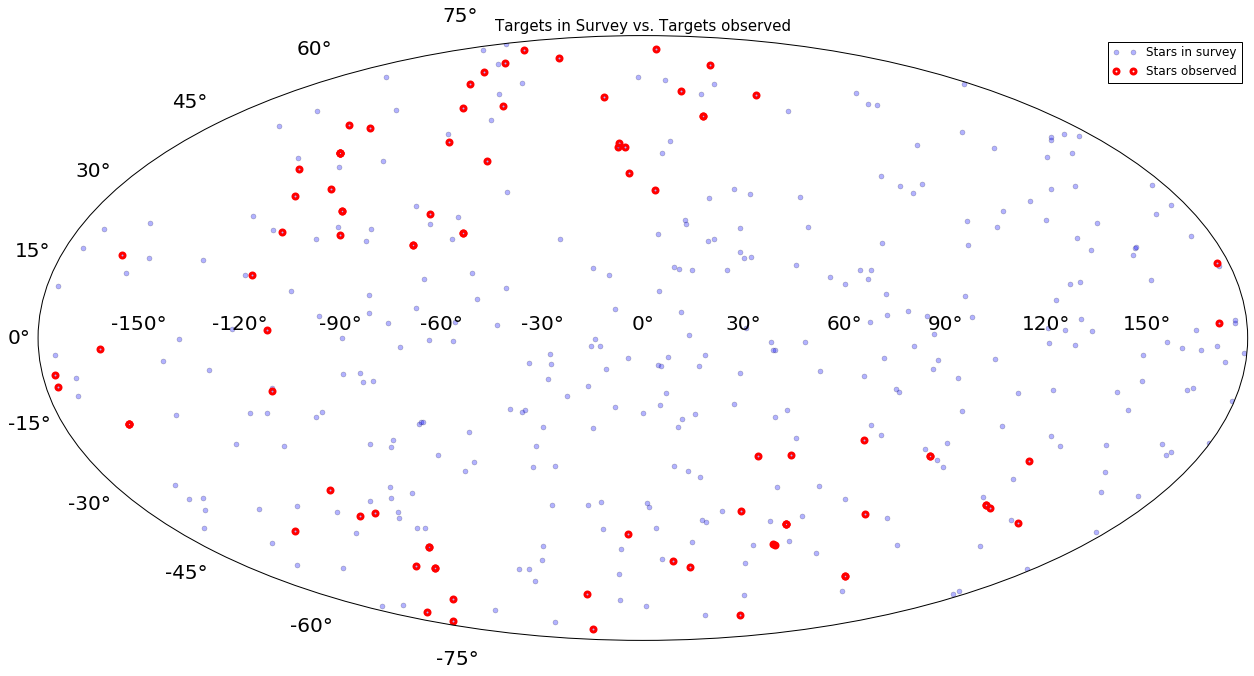

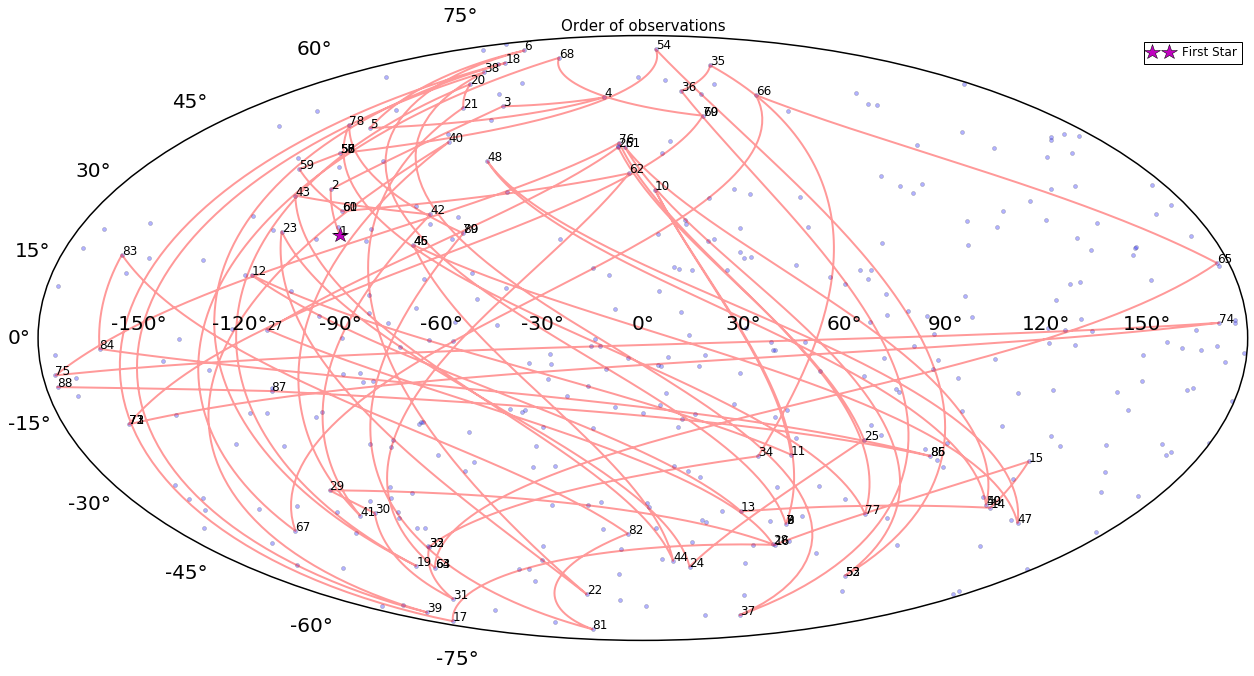

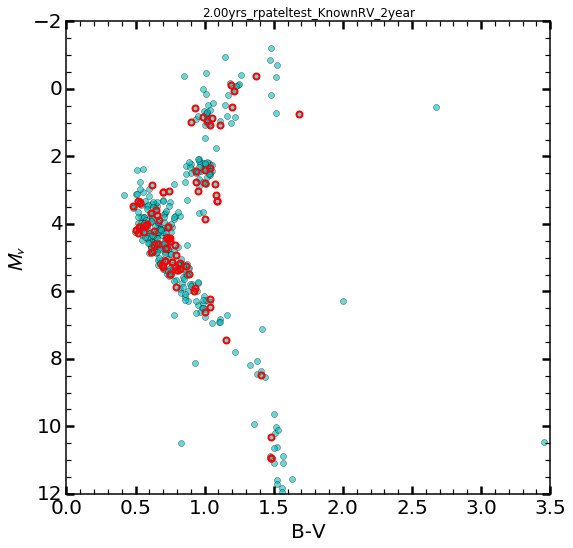

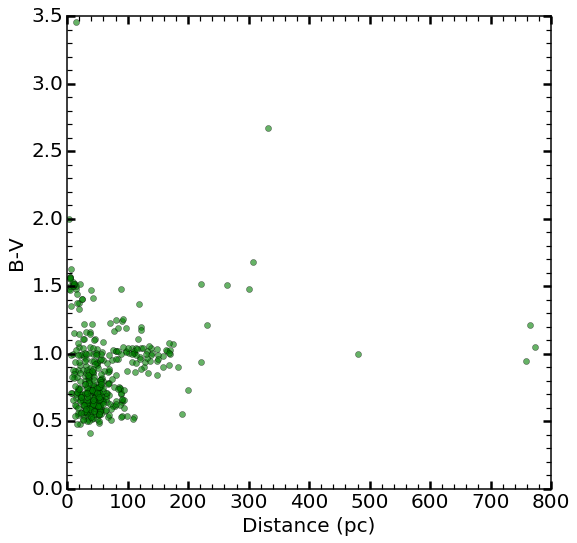

In [27]:
# SKY DISTRIBUTION OF TARGETS
save_plots = False
dirsave = os.path.join(baseFolder,'SimPlots')

coords = sp['coords']
ra_rad, dec_rad = coords.ra.wrap_at(180*u.deg).radian, coords.dec.radian
BV, MV = sp['BV'], sp['MV']
dist = sp['dist']

# ==================================================================================================================
# ==================================================================================================================
axt = plt.figure(figsize=(20,20)).add_subplot(111,projection='aitoff')
PT.plot_setup(axt)
axt.plot(ra_rad,dec_rad,'o',ms=5,alpha=0.3,label='Stars in survey')
axt.plot(ra_rad[target_obsind],dec_rad[target_obsind],'ro',ms=5,mfc='none',mec='r',
                                                        mew=3,label='Stars observed')
#axt.set_title('Targets in Survey vs. Targets observed; %s' %basesim)    
axt.set_title('Targets in Survey vs. Targets observed',fontsize=15)
plt.legend()
if save_plots: plt.savefig(os.path.join(dirsave,'sky_targets_%s.png'%basesim))

# ==================================================================================================================
#         Observation Order
# ==================================================================================================================
axt2 = plt.figure(figsize=(20,20)).add_subplot(111,projection='aitoff')
PT.plot_setup(axt2)
axt2.plot(ra_rad,dec_rad,'bo',ms=4,alpha=0.3)
axt2.plot(ra_rad[target_obsind],dec_rad[target_obsind],'r-',mew=2,lw=2,alpha=0.4)

for i,j in enumerate(target_obsind):
    if i == 0:
        axt2.plot(ra_rad[j],dec_rad[j],'m*',ms=16,label='First Star')
    axt2.text(ra_rad[j],dec_rad[j],str(i+1),color='k',fontsize=12)
plt.title('Order of observations',fontsize=15)    
if save_plots: plt.savefig(os.path.join(dirsave,'sky_targets_order_%s.png'%basesim))
plt.legend()

# ==================================================================================================================
#         CMD
# ==================================================================================================================
kw = {'markersize':6,'color':'c','marker':'o','alpha':.6}
axbv = scatterPlot(BV,MV,labels=('B-V','$M_v$'),**kw)
axbv.plot(BV[target_obsind],MV[target_obsind],'ro',markersize=6,mfc='none',mec='r',mew=2)
axbv.set_ylim(axbv.get_ylim()[::-1])
axbv.set_title('%s' %basesim)          
if save_plots: axbv.savefig(os.path.join(dirsave,'target_CMD_%s.png'%basesim))

# ==================================================================================================================
#            DISTANCE VS. B-V
# ==================================================================================================================

kw = {'markersize':6,'color':'g','marker':'o','alpha':.6}
axbvd = scatterPlot(dist,BV,labels=('Distance (pc)','B-V'),**kw)
#axbvd.plot(dist[target_obsind],BV[target_obsind],'ro',ms=6,mfc='none',mec='r',mew=2)
#axbvd.set_title('%s'%basesim)
#if save_plots: axbvd.savefig(os.path.join(dirsave,'target_dist_v_B-V_%s.png'%basesim))


## Planet Plots

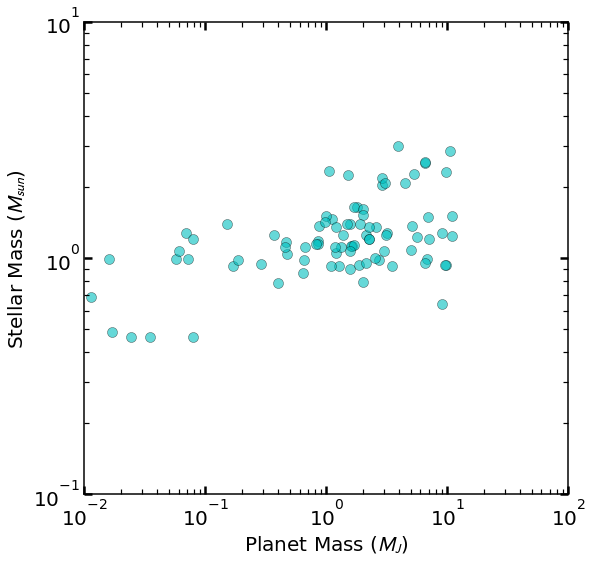

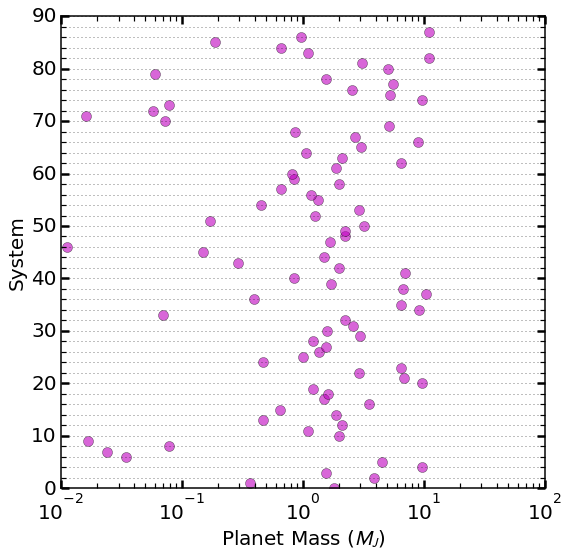

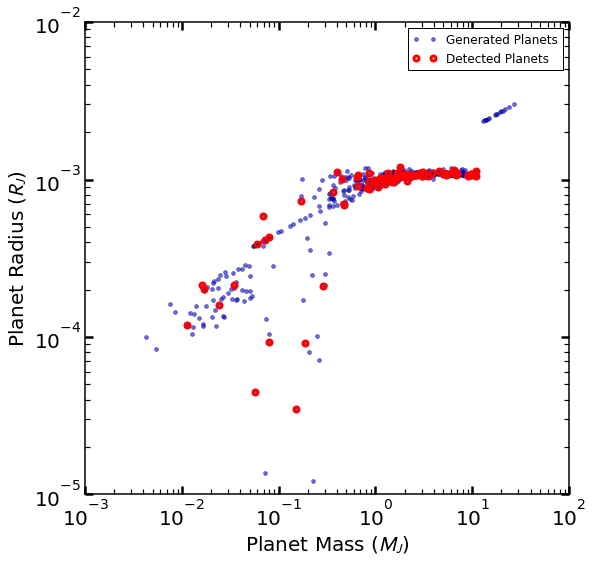

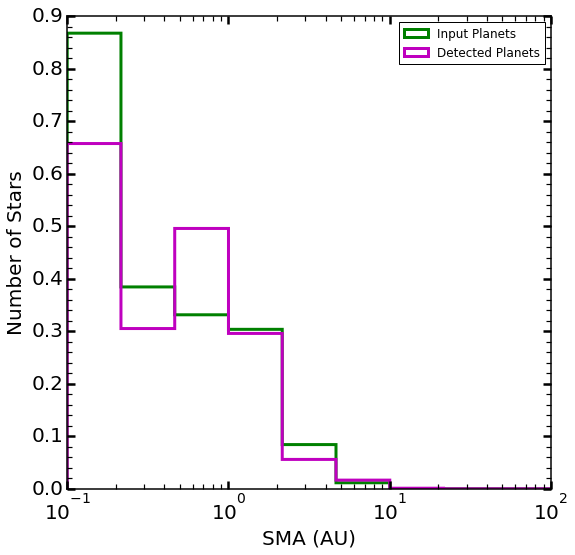

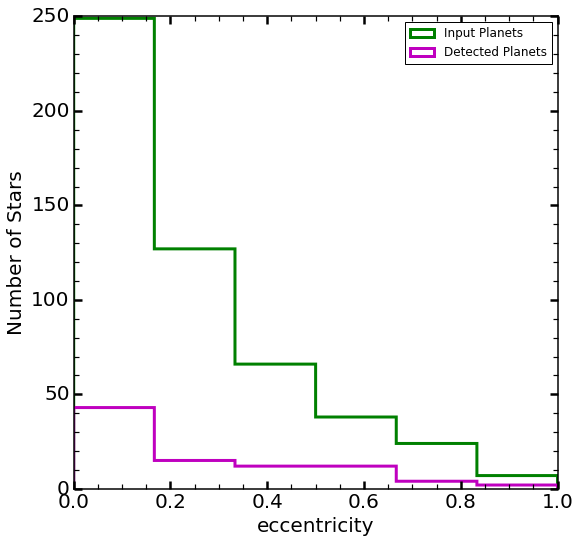

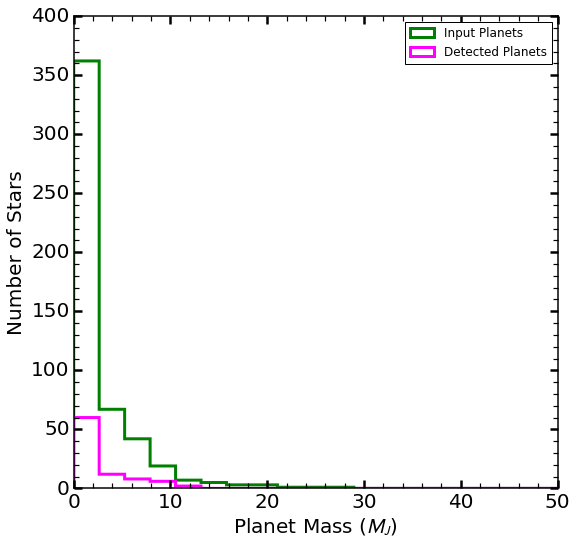

In [31]:
Rj = 69.911e6 #meters
Mj = 1.898e27 #Kg

# BINS & DATA
Mp,Rp = pd_e['Mp'], pd_e['Rp']
sma,ecc = pd_e['sma'], pd_e['e']
ebins = np.linspace(0,1,7)
logarange = np.log10(arange)
smabins = np.logspace(logarange[0],logarange[1],10)
massbins = np.linspace(.001,50,20)

# PLANET MASS VS. STELLAR MASS
kw = {'markersize':10,'color':'c','marker':'o','alpha':.6, 'label':'Generated Planets'}
axp = scatterPlot(Mp[[DDRM['plan_inds']]]/Mj,sp['MsTrue'][DDRM['star_ind']],
                  labels=('Planet Mass ($M_J$)','Stellar Mass ($M_{sun}$)'),
                  xlog=True, ylog=True,**kw)

# PLANET MASS VS. system
system = np.arange(len(DDRM['plan_inds']))
kw = {'markersize':10,'color':'m','marker':'o','alpha':.6, 'label':'Generated Planets'}
axp = scatterPlot(Mp[[DDRM['plan_inds']]]/Mj,system,
                  labels=('Planet Mass ($M_J$)','System'),
                  xlog=True, ylog=False,**kw)
axp.grid(which='both',axis='y')


# MASS VS. RADIUS OF PLANETS
kw = {'markersize':4,'color':'b','marker':'o','alpha':.6, 'label':'Generated Planets'}
axp = scatterPlot(Mp/Mj,Rp/Rj,labels=('Planet Mass ($M_J$)','Planet Radius ($R_J$)'),
                  xlog=True, ylog=True,**kw)
axp.plot(Mp[detind_pl]/Mj,Rp[detind_pl]/Rj,'ro',ms=5,mfc='none',mec='r', mew=3,label='Detected Planets')
plt.legend()
if save_plots: axp.savefig(os.path.join(dirsave,'planet_R_v_M_%s.png'%basesim))


# HISTOGRAM OF SMA
kw = {'histtype':'step','normed':True,'lw':3,'color':'g','label':'Input Planets'}
axps = histPlot(sma,bins=smabins,labels=('SMA (AU)','Number of Stars'),
                xlog=True,**kw)
kw = {'histtype':'step','normed':True,'lw':3,'color':'m','label':'Detected Planets'}
axps = histPlot(sma[detind_pl],smabins,axps,labels=('SMA (AU)','Number of Stars'),
                xlog=True, **kw)
plt.legend()
if save_plots: axps.savefig(os.path.join(dirsave,'planet_SMA_distribution_%s.png'%basesim))


# HISTOGRAM OF ECCENTRICITY
kw = {'histtype':'step','lw':3,'color':'g','label':'Input Planets'}
axe = histPlot(ecc,bins=ebins,labels=('eccentricity','Number of Stars'),**kw)
axe.hist(ecc[detind_pl],bins=ebins,histtype='step',lw=3,color='m',label='Detected Planets');
plt.legend()
if save_plots: axe.savefig(os.path.join(dirsave,'planet_ecc_distribution_%s.png'%basesim))

# HISTOGRAM OF PLANET MASS
kw = {'histtype':'step','lw':3,'color':'g','label':'Input Planets'}
axps = histPlot(Mp/Mj,bins=massbins,
                labels=(r'Planet Mass ($M_J$)','Number of Stars'),**kw)
axps.hist(Mp[detind_pl]/Mj,bins=massbins,histtype='step',lw=3,color='magenta',label='Detected Planets');
plt.legend()
if save_plots:axps.savefig(os.path.join(dirsave,'planet_SMA_distribution_%s.png'%basesim))





# Detected Planets

## Characterization status of detected planets